# P221014457 吴娅蕾 2022级广告学1班

In [134]:
import mytools
import pandas as pd

In [135]:
# 读取数据
数据表 = mytools.读取SPSS数据文件(R'data\demo.sav')

# 明确数据分析目标
<!-- 要求有单变量、双变量、多变量数据分析 -->
1. 对样本的情况进行描述统计
2. 信息鉴别能力 与 接触电子媒介时间 有相关性
3. 信息鉴别能力 、接触电子媒介时间、工作满意程度 影响 生活满意程度

# 数据清理与转化

In [136]:
数据表.rename(columns={
    '@10、1您家里有':'家庭规模',
    '@10、2口人，是':'代际',
    '@3、您的婚姻状况：':'婚姻状况',
    '@9、您的月收入大约是多少？':'月收入',
    '@15、1您每天通过手机上网的时间大概为':'手机上网时间',
    '@15、2分钟，您每天通过电脑上网的时间为':'电脑上网时间',
    }, inplace=True)

## 数据清理

1. 重复值处理
2. 空白值处理
3. 异常值处理
4. 变量类型设置
5. 逻辑一致性清理

In [137]:
### 重复值处理
数据表.drop_duplicates(subset=['序号'],keep='first',inplace=True)

In [138]:
### 空白值处理
# 查看变量是否存在空白值
数据表[数据表.isnull().T.any()].head(2)
# 数据表['婚姻状况'].isnull()


,序号,@1、您的性别：,@2、您的年龄：,婚姻状况,@4、您的受教育程度是：,@5、您的政治面貌：,@7、您的信仰是：,@8、您的职业是：,月收入,家庭规模,...,@27、调研地点,@28、问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,NaN,未上过学,群众,佛教,牧民,NaN,NaN,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,NaN,NaN,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0


In [139]:
### 空白值处理
# 查看变量是否存在空白值
数据表['手机上网时间'].isnull()

0      True
1      True
2      True
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Name: 手机上网时间, Length: 94, dtype: bool

In [140]:
### 空白值处理
# 查看变量是否存在空白值
数据表['电脑上网时间'].isnull()

0      True
1      True
2      True
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Name: 电脑上网时间, Length: 94, dtype: bool

In [141]:
# 数据表['月收入'].mean()
数据表['手机上网时间'].mean()

70.33707865168539

In [142]:
数据表['电脑上网时间'].mean()

2.191011235955056

In [143]:
# 对指定变量填充空白值
数据表['婚姻状况'].fillna('已婚', inplace=True)
数据表['月收入'].fillna('三千元以下', inplace=True)
数据表['家庭规模'].fillna(6, inplace=True)
数据表['手机上网时间'].fillna(70, inplace=True)
数据表['电脑上网时间'].fillna(2, inplace=True)


In [144]:
# 对特定值进行替换
数据表['代际'].replace({'(空)':None}, inplace=True)
数据表['代际'].fillna(3, inplace=True)


In [145]:
# 设定变量类型
数据表.astype({'代际':'int'}).head(2)

,序号,@1、您的性别：,@2、您的年龄：,婚姻状况,@4、您的受教育程度是：,@5、您的政治面貌：,@7、您的信仰是：,@8、您的职业是：,月收入,家庭规模,...,@27、调研地点,@28、问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,已婚,未上过学,群众,佛教,牧民,三千元以下,6.0,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,三千元以下,6.0,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0


In [146]:
数据表.columns

Index(['序号', '@1、您的性别：', '@2、您的年龄：', '婚姻状况', '@4、您的受教育程度是：', '@5、您的政治面貌：',
       '@7、您的信仰是：', '@8、您的职业是：', '月收入', '家庭规模', '代际', '@10、3代人，家里有',
       '@10、4位老人，家里有', '@10、5个小孩，外出打工的人有___人。', '@11、您平常是否通过电脑上网？',
       '@12、您平常是否通过手机上网？', '@13、您平时一周有几天通过电脑上网？', '@14、您平时一周有几天通过手机上网？',
       '手机上网时间', '电脑上网时间', '@15、3分钟，您每个月的手机话费为', '@15、4元，您家的宽带费为___元。',
       '@16、互联网使用行为（问卷17题至26题）—17、您', '@16、18、您认为您在上网时使用搜索引擎（百度',
       '@16、19、您经常会通过互联网（辣椒直播、下厨', '@16、20、您认为您玩手机网络游戏（斗地主、斗',
       '@16、21、您经常会通过互联网观看小说么？', '@16、22、您经常会通过互联网观看视频（快手、',
       '@16、23、您认为您通过即时通讯（微信、QQ）与他', '@16、24、您经常会通过社交网络（微博、陌陌、',
       '@16、25、您认为您在互联网（淘宝、拼多多、京', '@16、26、您经常使用移动支付（支付宝、微信支',
       'Q17_1_我目前的生活接近我理想的状态', 'Q17_2_我的生活条件在各方面都很不错。', 'Q17_3_对我目前的生活，我很满意。',
       'Q17_4_到目前为止，我已经得到了我想要的东西', 'Q17_5_如果我能再活一次我没有什么要改变',
       '@18、请表述您最近一周的情感状况—6.爱', '@18、7.愉悦', '@18、8.自豪', '@18、9.愤怒',
       '@18、10.忧虑', '@18、11.悲哀', '@19、第三部分—1.我能够获得足够有用的媒介信',
       '@19、2.我能够不断更新自己的信息获取技能。', '@19、3.我具有较强的信息获取意识。',

In [147]:
# 生成变量 信息鉴别能力
数据表['信息鉴别能力'] = 数据表['@19、9.我能够通过信息发布机构的权威性判断信']     
+ 数据表['@19、7.我能够判断当前信息是在陈述事实还是表']
+ 数据表['@19、6.能够通过标题、内容等判断信息的可信度']
+ 数据表['@19、3.我具有较强的信息获取意识。']
+ 数据表['@19、2.我能够不断更新自己的信息获取技能。']
+ 数据表['@19、5.我能够通过寻找佐证资料判断信息的可信']
+ 数据表['@19、8.我能够评估媒介信息内容对他人或社会可']

0     3.0
1     3.0
2     3.0
3     2.0
4     3.0
     ... 
89    3.0
90    4.0
91    3.0
92    4.0
93    4.0
Name: @19、8.我能够评估媒介信息内容对他人或社会可, Length: 94, dtype: float64

In [148]:
# 生成变量 接触电子媒介时间
数据表['接触电子媒介时间'] = 数据表['手机上网时间']  + 数据表['电脑上网时间']

In [149]:
# 生成变量 工作满意程度
数据表['工作满意程度'] = 数据表['Q20_1_我对目前的工作相当满意。']     
+ 数据表['Q20_2_大多数时候我对工作充满热情。']
+ 数据表['Q20_3_我不会感到每天的工作似乎永远不会结束。']

0     5.0
1     5.0
2     5.0
3     6.0
4     5.0
     ... 
89    5.0
90    6.0
91    5.0
92    4.0
93    2.0
Name: Q20_3_我不会感到每天的工作似乎永远不会结束。, Length: 94, dtype: float64

In [150]:
# 生成变量 生活满意程度
数据表['生活满意程度'] = 数据表['Q17_1_我目前的生活接近我理想的状态']     
+ 数据表['Q17_3_对我目前的生活，我很满意。']
+ 数据表['Q17_4_到目前为止，我已经得到了我想要的东西']
+ 数据表['Q17_2_我的生活条件在各方面都很不错。']
+ 数据表['Q17_5_如果我能再活一次我没有什么要改变']

0     4.0
1     4.0
2     5.0
3     6.0
4     4.0
     ... 
89    4.0
90    5.0
91    5.0
92    4.0
93    3.0
Name: Q17_5_如果我能再活一次我没有什么要改变, Length: 94, dtype: float64

# 数据分析

### 单变量统计分析

In [151]:
stats = 数据表['接触电子媒介时间'].describe()  
print(stats)

count     94.00000
mean      72.50000
std       82.35822
min        0.00000
25%       22.50000
50%       60.00000
75%       80.00000
max      370.00000
Name: 接触电子媒介时间, dtype: float64


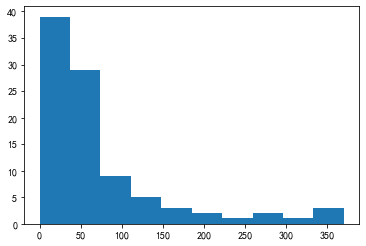

<ipython-input-152-5191474097f9>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(数据表['接触电子媒介时间'], kde=True)
C:\Users\Stacey\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


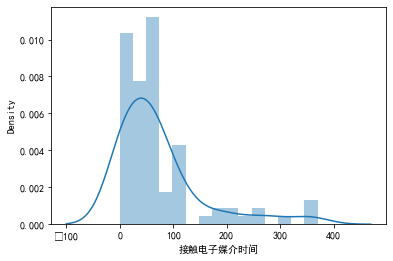

In [152]:
# 数据可视化

import matplotlib.pyplot as plt  
import seaborn as sns  
  
# 直方图  
plt.hist(数据表['接触电子媒介时间'], bins=10)  # bins参数表示直方图的条形数量  
plt.show()  
  
# 或者使用Seaborn的distplot函数，它可以同时显示直方图和核密度估计(KDE)  
sns.distplot(数据表['接触电子媒介时间'], kde=True)  
plt.show()

### 双变量统计分析

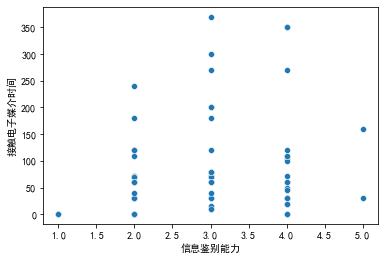

In [153]:
import matplotlib.pyplot as plt  
import seaborn as sns  
 
sns.scatterplot(x='信息鉴别能力', y='接触电子媒介时间', data=数据表)  
plt.show()

In [154]:
# 计算皮尔逊相关系数  
correlation = 数据表['信息鉴别能力'].corr(数据表['接触电子媒介时间'])  
print(f"The correlation between 信息鉴别能力 and 接触电子媒介时间 is: {correlation}")

The correlation between 信息鉴别能力 and 接触电子媒介时间 is: 0.23281928227751303


In [155]:
tau_y = mytools.goodmanKruska_tau_y(数据表,'信息鉴别能力','接触电子媒介时间')
print(tau_y)

0.08175173419121332


In [156]:
mytools.相关系数判断(tau_y)

'极弱相关或无相关'

### 多变量统计分析

In [157]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error  
  
  
# 选择特征和目标变量  
X = 数据表[['信息鉴别能力', '接触电子媒介时间', '工作满意程度']]  # 替换为你的特征列名  
y = 数据表['生活满意程度']  # 替换为你的目标列名  
  
# 分割数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# 创建并拟合线性回归模型  
model = LinearRegression()  
model.fit(X_train, y_train)  
  
# 使用模型进行预测  
y_pred = model.predict(X_test)  
  
# 评估模型性能  
mse = mean_squared_error(y_test, y_pred)  
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6367497253498037


In [158]:
# 创建交互表
cross_tab = pd.crosstab(index=[数据表['信息鉴别能力'], 数据表['接触电子媒介时间']], 
                        columns=数据表['工作满意程度'], 
                        margins=True, normalize=True)  # All 行和列的总和

cross_tab

工作满意程度               -2.0       2.0       3.0       4.0       5.0       6.0  \
信息鉴别能力 接触电子媒介时间                                                               
1.0    0.0       0.000000  0.000000  0.000000  0.000000  0.021277  0.010638   
2.0    0.0       0.010638  0.000000  0.000000  0.031915  0.021277  0.053191   
       30.0      0.000000  0.000000  0.000000  0.010638  0.021277  0.021277   
       40.0      0.000000  0.000000  0.000000  0.000000  0.010638  0.000000   
       60.0      0.000000  0.010638  0.000000  0.000000  0.021277  0.031915   
       70.0      0.000000  0.000000  0.000000  0.000000  0.010638  0.010638   
       72.0      0.000000  0.000000  0.010638  0.000000  0.000000  0.010638   
       110.0     0.000000  0.000000  0.000000  0.010638  0.000000  0.000000   
       120.0     0.000000  0.000000  0.000000  0.000000  0.010638  0.021277   
       180.0     0.000000  0.000000  0.000000  0.000000  0.010638  0.000000   
       240.0     0.010638  0.000000  0.000000  0.000000  0.000000  0.000000   
3.0    10.0      0.000000  0.000000  0.000000  0.000000  0.000000  0.021277   
       15.0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       30.0      0.000000  0.010638  0.000000  0.000000  0.000000  0.031915   
       40.0      0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
       60.0      0.000000  0.000000  0.000000  0.010638  0.053191  0.010638   
       70.0      0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
       72.0      0.000000  0.000000  0.000000  0.000000  0.010638  0.010638   
       80.0      0.000000  0.010638  0.000000  0.000000  0.021277  0.010638   
       120.0     0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
       180.0     0.000000  0.000000  0.000000  0.000000  0.010638  0.000000   
       200.0     0.000000  0.000000  0.000000  0.000000  0.021277  0.000000   
       270.0     0.000000  0.000000  0.000000  0.010638  0.000000  0.000000   
       300.0     0.000000  0.000000  0.000000  0.010638  0.000000  0.000000   
       370.0     0.000000  0.000000  0.000000  0.000000  0.010638  0.000000   
4.0    0.0       0.000000  0.000000  0.000000  0.000000  0.010638  0.010638   
       20.0      0.000000  0.000000  0.000000  0.000000  0.010638  0.010638   
       30.0      0.000000  0.000000  0.000000  0.000000  0.021277  0.031915   
       45.0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       50.0      0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
       60.0      0.010638  0.000000  0.000000  0.000000  0.010638  0.021277   
       72.0      0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
       100.0     0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
       105.0     0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
       110.0     0.000000  0.000000  0.000000  0.000000  0.010638  0.010638   
       120.0     0.010638  0.000000  0.000000  0.000000  0.000000  0.000000   
       270.0     0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
       350.0     0.000000  0.000000  0.000000  0.000000  0.021277  0.000000   
5.0    30.0      0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
       160.0     0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
All              0.042553  0.031915  0.010638  0.085106  0.340426  0.436170   

工作满意程度                7.0       All  
信息鉴别能力 接触电子媒介时间                      
1.0    0.0       0.000000  0.031915  
2.0    0.0       0.021277  0.138298  
       30.0      0.000000  0.053191  
       40.0      0.000000  0.010638  
       60.0      0.000000  0.063830  
       70.0      0.000000  0.021277  
       72.0      0.000000  0.021277  
       110.0     0.000000  0.010638  
       120.0     0.000000  0.031915  
       180.0     0.000000  0.010638  
       240.0     0.000000  0.010638  
3.0    10.0      0.000000  0.021277  
       15.0      0.010638  0.010638  
       30.0      0.000000  0.042